<a href="https://colab.research.google.com/github/Rashmi365/AdminLTE/blob/master/Salary_Prediction_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression

In [288]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")


In [289]:
df=pd.read_csv('/content/eda_data.csv')
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


In [290]:
df.isnull().sum()
df.dtypes

,0
Unnamed: 0,int64
Job Title,object
Salary Estimate,object
Job Description,object
Rating,float64
Company Name,object
Location,object
Headquarters,object
Size,object
Founded,int64



Missing Values:
 Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
hourly               0
employer_provided    0
min_salary           0
max_salary           0
avg_salary           0
company_txt          0
job_state            0
same_state           0
age                  0
python_yn            0
R_yn                 0
spark                0
aws                  0
excel                0
job_simp             0
seniority            0
desc_len             0
num_comp             0
dtype: int64


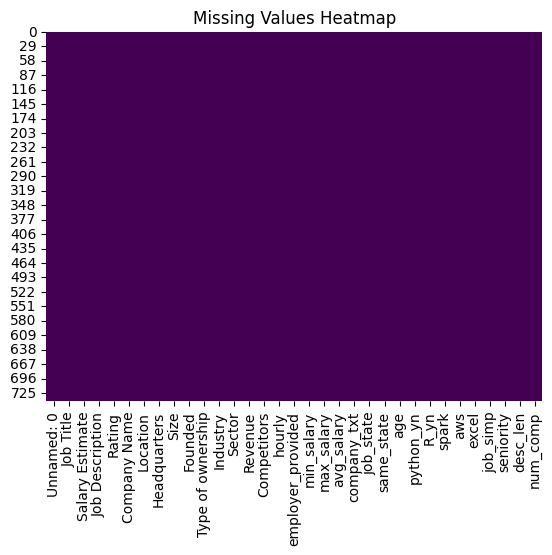

In [291]:
print("\nMissing Values:\n", df.isnull().sum())
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


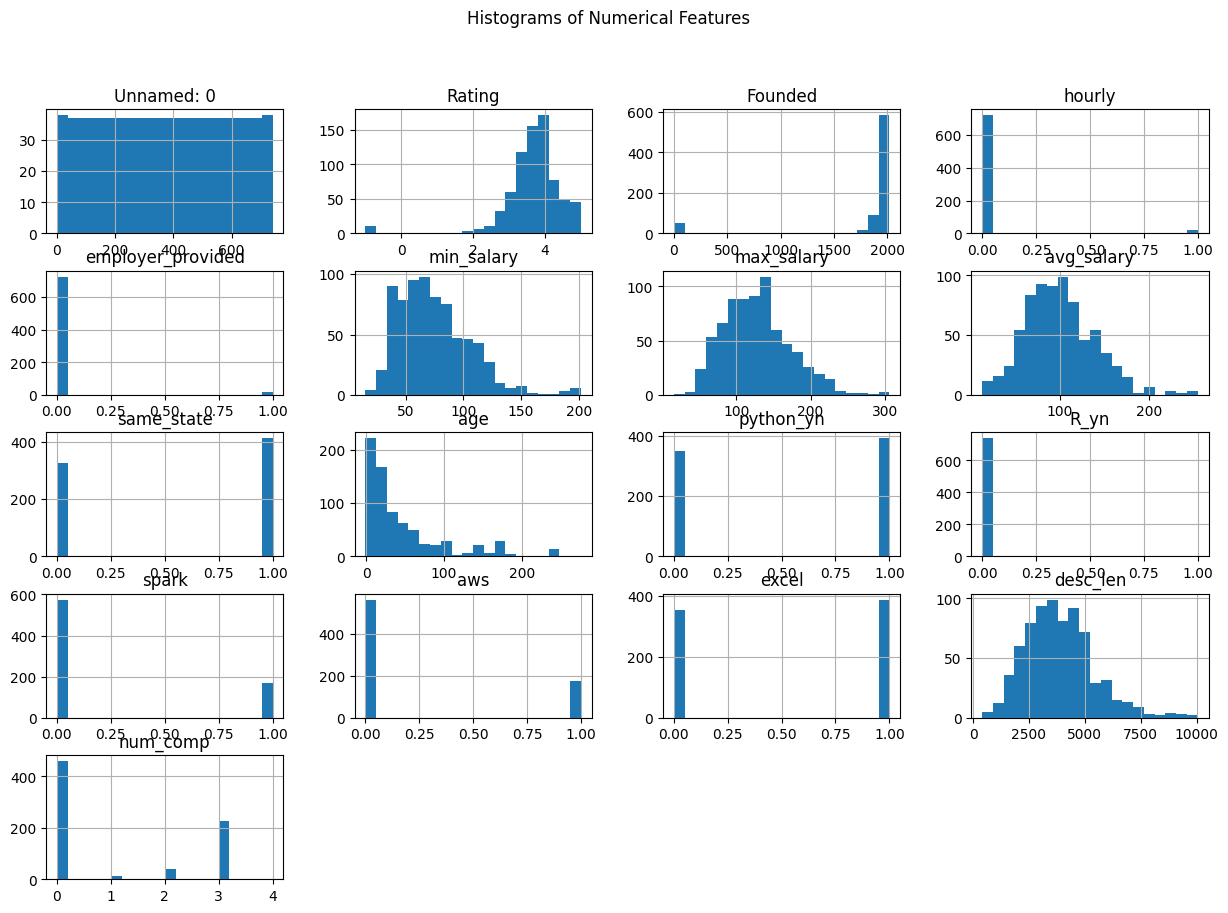

In [292]:
# Histogram for numerical features
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features")
plt.show()

In [293]:
df['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate', 'Finance',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Media', 'Insurance', 'Transportation & Logistics',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Education', 'Agriculture & Forestry',
       'Travel & Tourism', 'Non-Profit',
       'Arts, Entertainment & Recreation',
       'Construction, Repair & Maintenance', 'Accounting & Legal',
       'Consumer Services'], dtype=object)

In [294]:
df['Sector'].value_counts()

,count
Sector,
Information Technology,180
Biotech & Pharmaceuticals,112
Business Services,97
Insurance,69
Health Care,49
Finance,42
Manufacturing,34
Aerospace & Defense,25
Education,23


In [295]:
df['Sector'].replace('-1', 'other', inplace=True)
df['Sector'].value_counts()

,count
Sector,
Information Technology,180
Biotech & Pharmaceuticals,112
Business Services,97
Insurance,69
Health Care,49
Finance,42
Manufacturing,34
Aerospace & Defense,25
Education,23


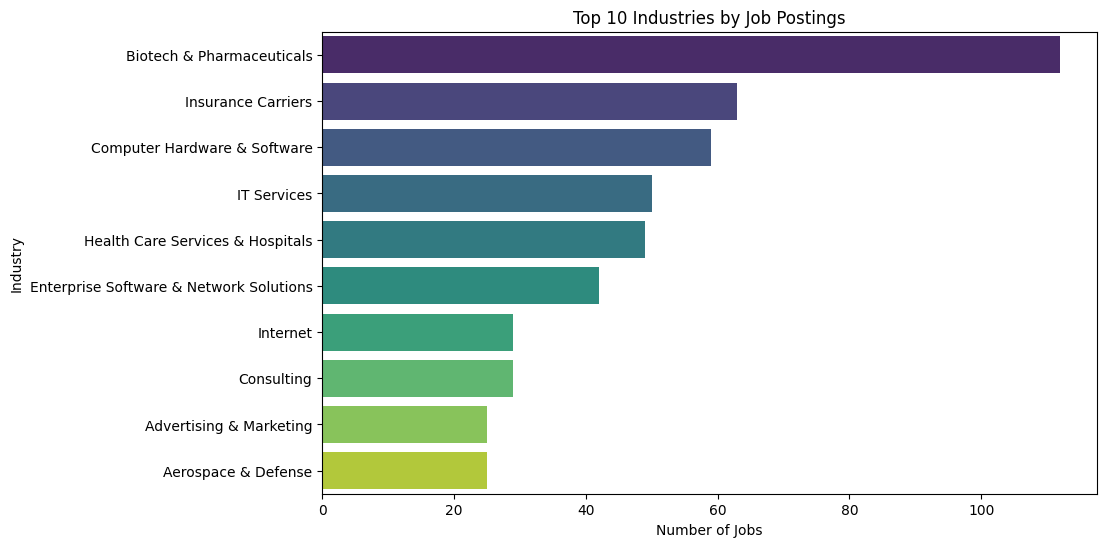

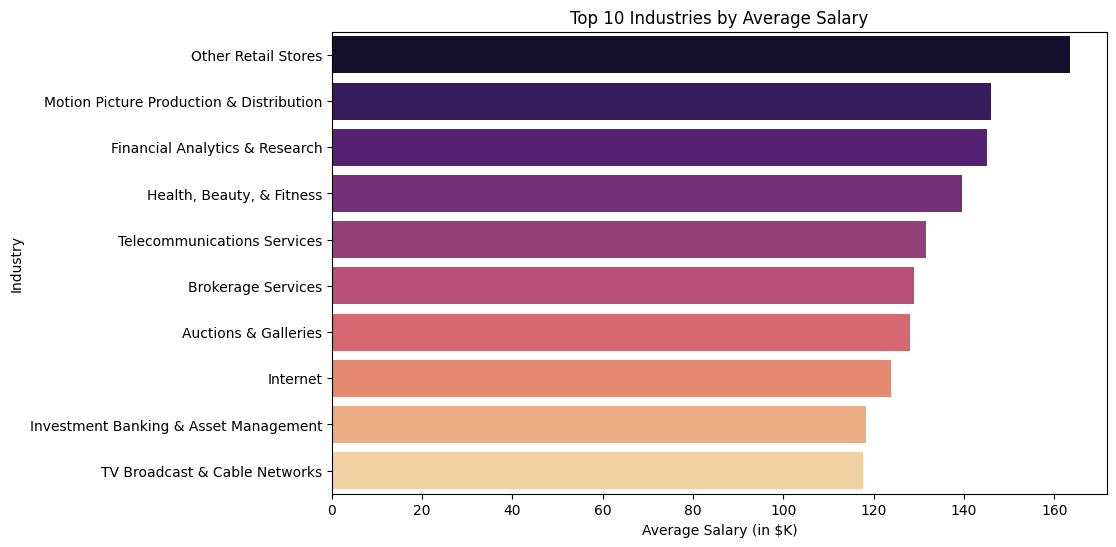

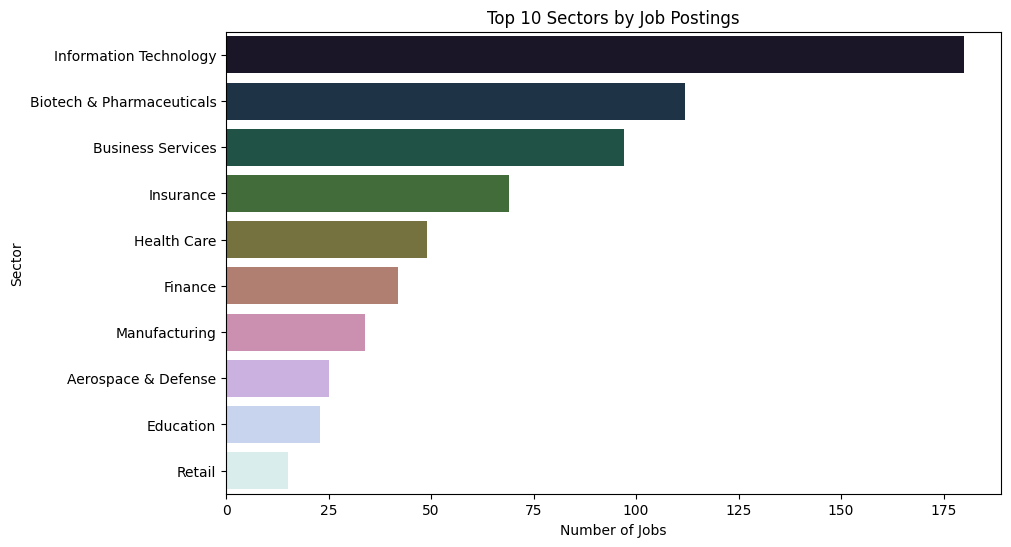

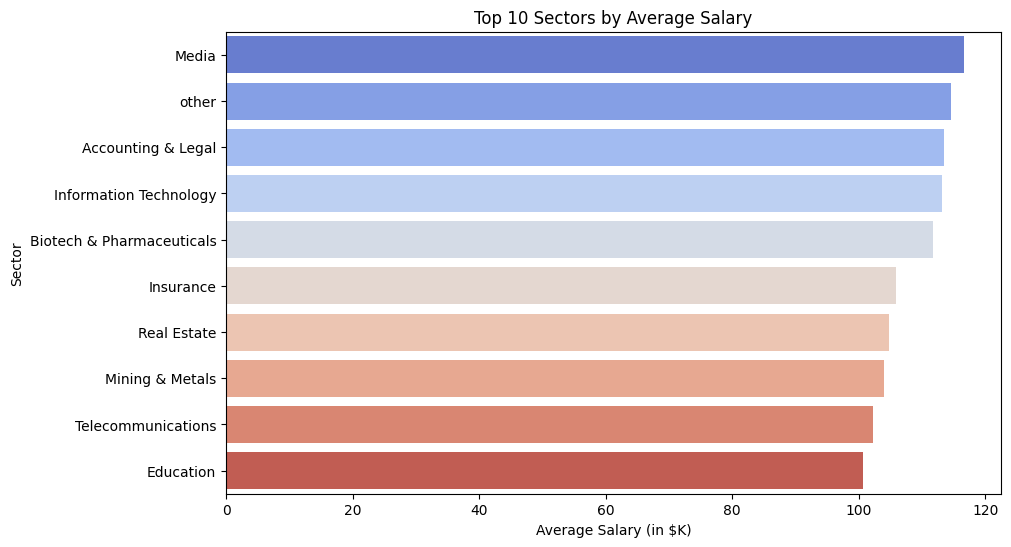

In [296]:

# Top 10 Industries by Number of Job Postings
top_industries = df['Industry'].value_counts().head(10)

# Top 10 Industries by Average Salary
top_salary_industries = df.groupby('Industry')['avg_salary'].mean().sort_values(ascending=False).head(10)

# Top 10 Sectors by Number of Job Postings
top_sectors = df['Sector'].value_counts().head(10)

# Top 10 Sectors by Average Salary
top_salary_sectors = df.groupby('Sector')['avg_salary'].mean().sort_values(ascending=False).head(10)

# Visualization 1: Top Industries by Job Postings
plt.figure(figsize=(10,6))
sns.barplot(x=top_industries.values, y=top_industries.index, palette="viridis")
plt.title("Top 10 Industries by Job Postings")
plt.xlabel("Number of Jobs")
plt.ylabel("Industry")
plt.show()

# Visualization 2: Top Industries by Average Salary
plt.figure(figsize=(10,6))
sns.barplot(x=top_salary_industries.values, y=top_salary_industries.index, palette="magma")
plt.title("Top 10 Industries by Average Salary")
plt.xlabel("Average Salary (in $K)")
plt.ylabel("Industry")
plt.show()

# Visualization 3: Top Sectors by Job Postings
plt.figure(figsize=(10,6))
sns.barplot(x=top_sectors.values, y=top_sectors.index, palette="cubehelix")
plt.title("Top 10 Sectors by Job Postings")
plt.xlabel("Number of Jobs")
plt.ylabel("Sector")
plt.show()

# Visualization 4: Top Sectors by Average Salary
plt.figure(figsize=(10,6))
sns.barplot(x=top_salary_sectors.values, y=top_salary_sectors.index, palette="coolwarm")
plt.title("Top 10 Sectors by Average Salary")
plt.xlabel("Average Salary (in $K)")
plt.ylabel("Sector")
plt.show()

In [297]:
df_copy=df#independent features
x = df_copy.drop(columns=['Salary Estimate', 'min_salary', 'max_salary', 'avg_salary'])
x.head()


,Unnamed: 0,Job Title,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,data scientist,na,2728,3


In [298]:
y=df['avg_salary']#dependent features
y.head()

,avg_salary
0,72.0
1,87.5
2,85.0
3,76.5
4,114.5


In [299]:
# Select categorical columns for one-hot encoding
categorical_cols = x.select_dtypes(include=['object']).columns

# Apply one-hot encoding
x_encoded = pd.get_dummies(x, columns=categorical_cols, drop_first=True)
xtrain,xtest,ytrain,ytest=train_test_split(x_encoded,y,test_size=0.2,random_state=42)

lin_reg=LinearRegression()
mse=cross_val_score(lin_reg,xtrain,ytrain,scoring='neg_mean_squared_error',cv=5)
mean_mse=np.mean(mse)
print(mean_mse)
lin_reg.fit(xtrain, ytrain)
ypred=lin_reg.predict(xtest)

r2_score(ytest,ypred)
print(r2_score(ytest,ypred))

-358.5427675778944
0.8515934386024299


In [300]:
ridge = Ridge()
params = {'alpha':[1e-15,1e-10,1e-9,2,3,4,5,10,50,70,80,90] }

ridge_regression = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=10)
ridge_regression.fit(xtrain, ytrain)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-09, 2, 3, 4, 5, 10, 50, 70,
                                   80, 90]},
             scoring='neg_mean_squared_error')

In [301]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 1e-10}
-360.3021993603642


In [302]:
ypred_ridge=ridge_regression.predict(xtest)
r2_score(ytest,ypred_ridge)
print(r2_score(ytest,ypred_ridge))

0.8515934369521405


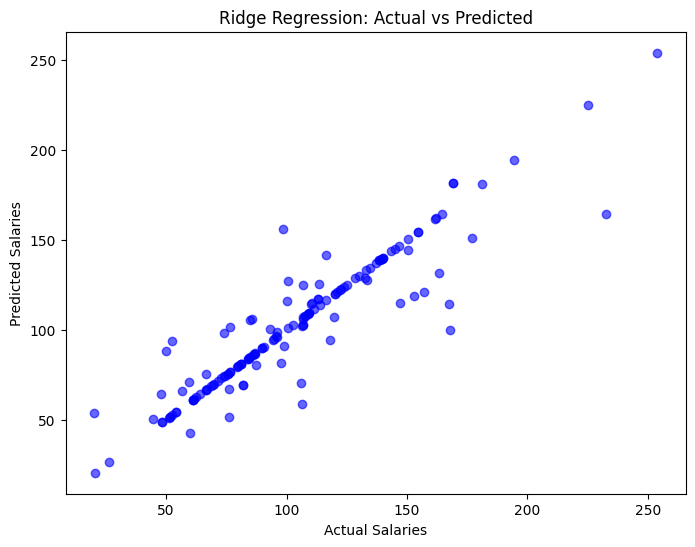

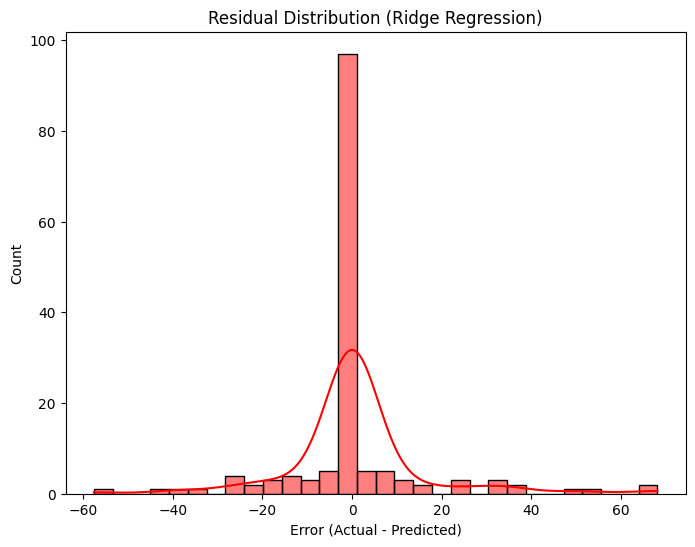

In [303]:

# 1. Actual vs Predicted Plot (for Ridge Regression)
plt.figure(figsize=(8,6))
plt.scatter(ytest, ypred_ridge, alpha=0.6, color="blue")
plt.xlabel("Actual Salaries")
plt.ylabel("Predicted Salaries")
plt.title("Ridge Regression: Actual vs Predicted")
plt.show()

# 2. Residuals Distribution (Error Analysis)
residuals = ytest - ypred_ridge
plt.figure(figsize=(8,6))
sns.histplot(residuals, bins=30, kde=True, color="red")
plt.title("Residual Distribution (Ridge Regression)")
plt.xlabel("Error (Actual - Predicted)")
plt.show()
